In [3]:
downsampled_paths={
'iCESM':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_evap_850_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_prec_850_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_tsurf_850_1850.nc',
       },
'isoGSM':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_evap_851_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_prec_851_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_tsurf_851_1850.nc',
       },    
'Echam':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_d18O_850_1849.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_evap_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_prec_850_1849.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_tsurf_850_1849.nc',
       },
'GISS':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/GISS_d18O_850_1849.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/GISS_evap_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/GISS_prec_850_1849.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/GISS_tsurf_850_1849.nc',
'slp': '/home/mchoblet/paleoda/data/model_data/downsampled/GISS_slp_850_1849.nc',
       },
'iHadCM3':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_d18O_801_1952.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_evap_801_1952.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_prec_801_1952.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_tsurf_801_1952.nc',
'slp':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_slp_801_1952.nc',
       }
}

downsampled_paths_nogiss={
'iCESM':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_d18O_850_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_evap_850_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_prec_850_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/CESM_tsurf_850_1850.nc',
       },
'isoGSM':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_d18O_851_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_evap_851_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_prec_851_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/CCSM_tsurf_851_1850.nc',
       },    
'Echam':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_d18O_850_1849.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_evap_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_prec_850_1849.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/ECHAM5_tsurf_850_1849.nc',
       },
'iHadCM3':{'d18O':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_d18O_801_1952.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_evap_801_1952.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_prec_801_1952.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_tsurf_801_1952.nc',
'slp':'/home/mchoblet/paleoda/data/model_data/downsampled/iHADCM3_slp_801_1952.nc',
       }
}

In [142]:
def gmt_together(folder='/home/mchoblet/paleoda/results/experiments/GMT_from_speleos/', names=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme','mme_nogiss'],cutoff=1/30,
                title='GMT reconstructed from SISAL records (wrt 1800-1850 mean)',
                ):
    """
    Which timescales are used? First 1,5,10,20,40
    """
    plt.figure(figsize=(16,12))
    plt.locator_params(nbins=10)
    colors=np.concatenate([sns.color_palette('colorblind', n_colors=(len(names)-1)),[(0,0,0)]])
    plt.title(title, fontsize=40)
    
    for i,n in enumerate(names):
        string=folder + n + '_800_1999.nc'
        tsurf=xr.open_dataset(string)['gm_tsurf']
        tsurf=quick_filt(tsurf-tsurf[1000:1050].mean('time'),cutoff=cutoff)
        #choose different cut off
        std=quick_filt(xr.open_dataset(string)['gm_tsurf_std'],cutoff=1/40)
        plt.plot(tsurf,label=n, color=colors[i])
        #plt.fill_between(tsurf, tsurf - std, tsurf + std, color=colors[i], alpha=0.2)
    
    plt.ylabel(r'$\Delta$ T',fontsize=28)
    plt.legend(loc='lower right',fontsize=22)
    plt.xticks(ticks=np.arange(0,1200,200),labels=list(map(str,np.arange(800,2000,200))),fontsize=28)
    
def gmt_separate(folder='/home/mchoblet/paleoda/results/experiments/GMT_from_speleos/', names=['Echam','GISS','iCESM','isoGSM','iHadCM3'],paths=downsampled_paths):
    """
    Which timescales are used? First 1,5,10,20,40
    """
    colors=sns.color_palette('colorblind', n_colors=2)
    
    for i,n in enumerate(names):
        plt.figure(figsize=(12,8))
        plt.locator_params(nbins=10)
        plt.title(('GMT for model '+n), fontsize=30)
        
        string=folder + n + '_800_1999.nc'
        tsurf=xr.open_dataset(string)['gm_tsurf']
        tsurf=quick_filt(tsurf-tsurf[800:1000].mean('time'))
        std=quick_filt(xr.open_dataset(string)['gm_tsurf_std'],cutoff=1/40)
        plt.plot(np.arange(len(tsurf)),tsurf,label='reconstruction', color=colors[0])
    
        #load prior model
        tsurf=dataloader.annual_mean(xr.open_dataset(paths[n]['tsurf'])['tsurf'],check_nan=True)
        tsurf=utils.globalmean(tsurf)
        tsurf=quick_filt(tsurf-tsurf.sel(time=slice('1600','1800')).mean('time'))
    
        plt.plot(np.arange(len(tsurf)),tsurf,label='model', color=colors[1])
    
        plt.ylabel(r'$\Delta$ T',fontsize=30)
        plt.legend(loc='lower right',fontsize=28)
        
        
        plt.xticks(ticks=np.arange(0,1200,200),labels=list(map(str,np.arange(800,2000,200))),fontsize=25)
        plt.show()
        
def gmt_separate_all(folder1='/home/mchoblet/paleoda/results/experiments/GMT_from_icecores/', folder2='/home/mchoblet/paleoda/results/experiments/GMT_from_speleos/',
                     folder3='/home/mchoblet/paleoda/results/experiments/GMT_from_allproxies/',
                     names=['Echam','GISS','iCESM','isoGSM','iHadCM3'],paths=downsampled_paths):
    """
    Which timescales are used? First 1,5,10,20,40
    """
    colors=np.concatenate([sns.color_palette('colorblind', n_colors=3),[(0,0,0)]])
    
    for i,n in enumerate(names):
        plt.figure(figsize=(12,8))
        plt.locator_params(nbins=10)
        plt.title(('GMT for model '+n + '(wrt. 1800-1850)'), fontsize=20)
        
        #icecores
        string=folder1 + n + '_800_1999.nc'
        tsurf=xr.open_dataset(string)['gm_tsurf']
        tsurf=quick_filt(tsurf-tsurf[1000:1050].mean('time'))
        std=quick_filt(xr.open_dataset(string)['gm_tsurf_std'],cutoff=1/40)
        plt.plot(np.arange(len(tsurf)),tsurf,label='reconstruction (Iso2k)', color=colors[0])
        
        #speleos
        string=folder2 + n + '_800_1999.nc'
        tsurf=xr.open_dataset(string)['gm_tsurf']
        tsurf=quick_filt(tsurf-tsurf[1000:1050].mean('time'))
        std=quick_filt(xr.open_dataset(string)['gm_tsurf_std'],cutoff=1/40)
        plt.plot(np.arange(len(tsurf)),tsurf,label='reconstruction (Sisalv2)', color=colors[1])
    
        #together 
        string=folder3 + n + '_800_1999.nc'
        tsurf=xr.open_dataset(string)['gm_tsurf']
        tsurf=quick_filt(tsurf-tsurf[1000:1050].mean('time'))
        std=quick_filt(xr.open_dataset(string)['gm_tsurf_std'],cutoff=1/40)
        plt.plot(np.arange(len(tsurf)),tsurf,label='reconstruction (Sisalv2 + Iso2k)', color=colors[2])
    
        #load prior model
        if n=='iHadCM3':
            check=True
        else:
            check=False
        
        tsurf=dataloader.annual_mean(xr.open_dataset(paths[n]['tsurf'])['tsurf'],check_nan=check)
        tsurf=utils.globalmean(tsurf)
        tsurf=quick_filt(tsurf-tsurf.sel(time=slice('1800','1850')).mean('time'))
    
        plt.plot(np.arange(len(tsurf)),tsurf,label='model', color=colors[3])
    
        plt.ylabel(r'$\Delta$ T')
        plt.legend(loc='lower right')
        
        plt.xticks(ticks=np.arange(0,1200,200),labels=list(map(str,np.arange(800,2000,200))))
        plt.show()

def quick_filt(ts,cutoff=1/30):
    from scipy.signal import butter, lfilter, filtfilt

    def butter_lowpass(cutoff, fs, order=6, kf=1.2):
        # kf:  scaling factor for the lowpass frequency; 1 = Nyquist, 1.2 =
        #' 1.2xNyquist is a tradeoff between reducing variance loss and keeping
        #' aliasing small
        #fs is basic timestep (min_ts)
        #nyquist frequency
        nyq = 0.5 * fs 
        normal_cutoff = cutoff / nyq * kf
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def butter_lowpass_filter(data, cutoff, fs, order=6):
        #filtfilt does not introduce a time-lag in comparison to butterworth 
        b, a = butter_lowpass(cutoff, fs, order=order)
        y = filtfilt(b, a, data)
        #y = lfilter(b, a, data)
        return y

    return butter_lowpass_filter(ts,cutoff,fs=1,order=4)

In [78]:
import sys
sys.path.append('/home/mchoblet/paleoda')

import xarray as xr
import wrapper
import dataloader
import tqdm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  
from matplotlib.offsetbox import AnchoredText    
import utils

import copy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GMT Plots
- anomaly (1600-1800 mean as reference)
- Timescales (1,5,10,20,40), in Iso2k only plot (1,10,20), reusing proxies
- Proxy Error = 0.1

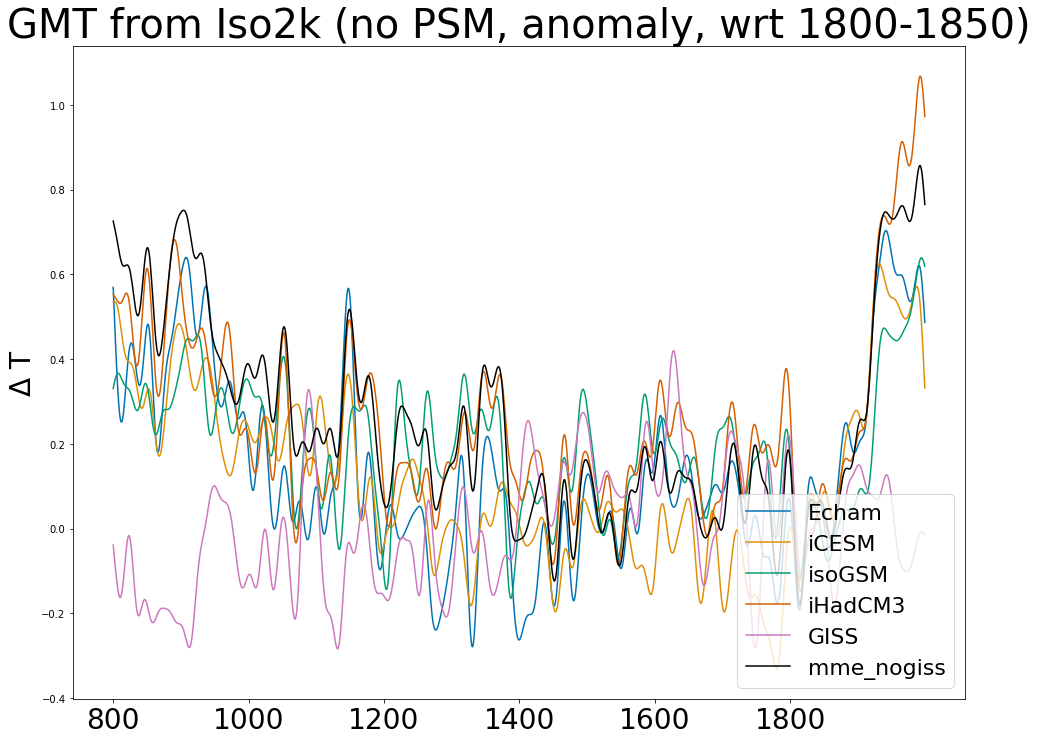

In [143]:
gmt_together(folder='/home/mchoblet/paleoda/results/experiments/GMT_from_icecores/', names=['Echam','iCESM','isoGSM','iHadCM3','GISS','mme_nogiss'],title='GMT from Iso2k (no PSM, anomaly, wrt 1800-1850)')

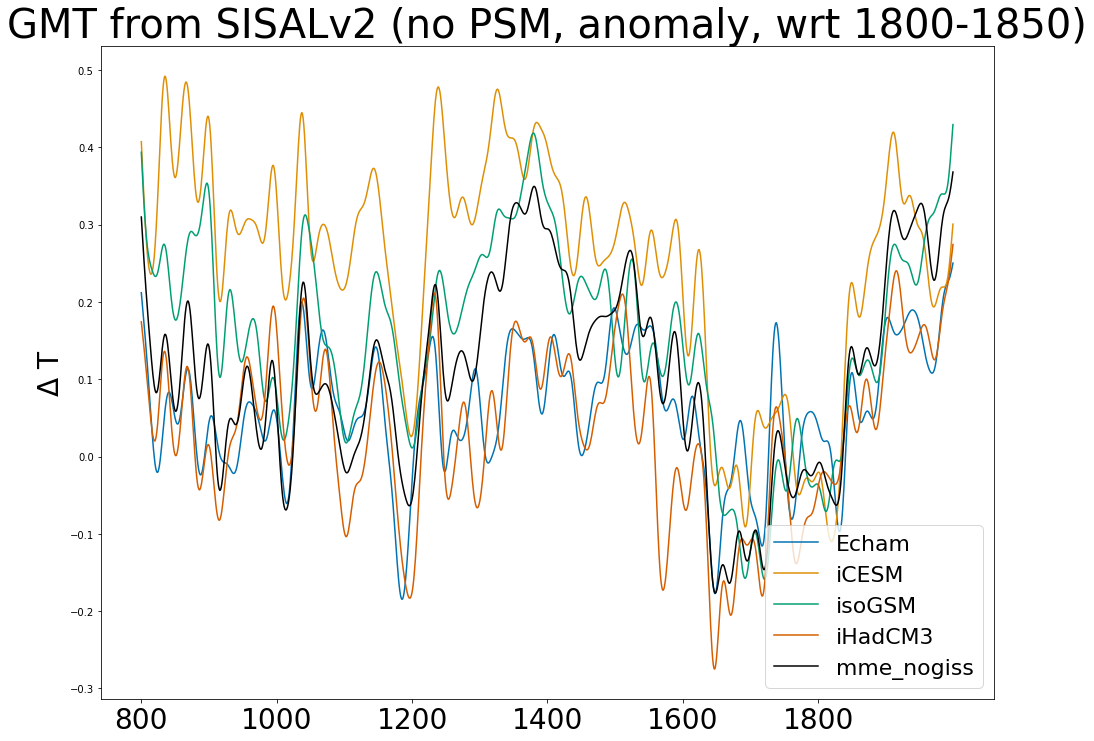

In [145]:
gmt_together(folder='/home/mchoblet/paleoda/results/experiments/GMT_from_speleos/', names=['Echam','iCESM','isoGSM','iHadCM3','mme_nogiss'],title='GMT from SISALv2 (no PSM, anomaly, wrt 1800-1850)')

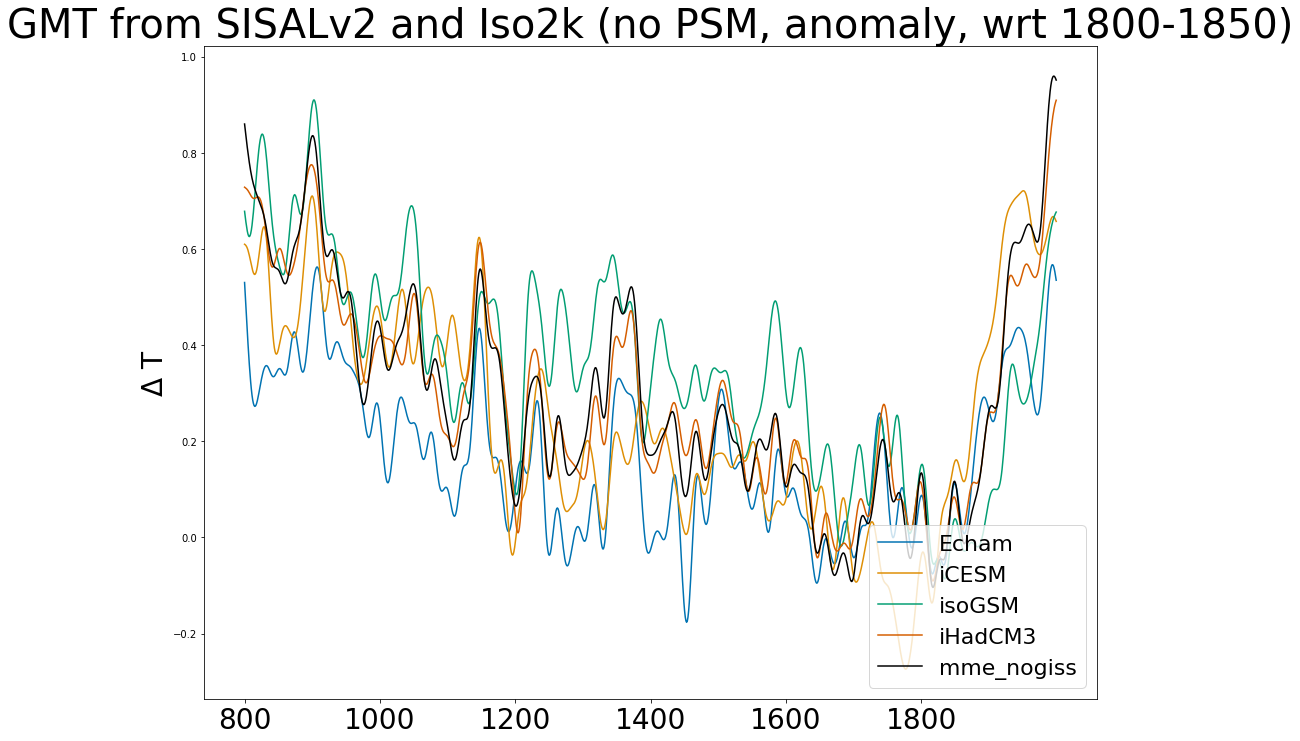

In [147]:
gmt_together(folder='/home/mchoblet/paleoda/results/experiments/GMT_from_allproxies/', names=['Echam','iCESM','isoGSM','iHadCM3','mme_nogiss'],cutoff=1/30,title='GMT from SISALv2 and Iso2k (no PSM, anomaly, wrt 1800-1850)')

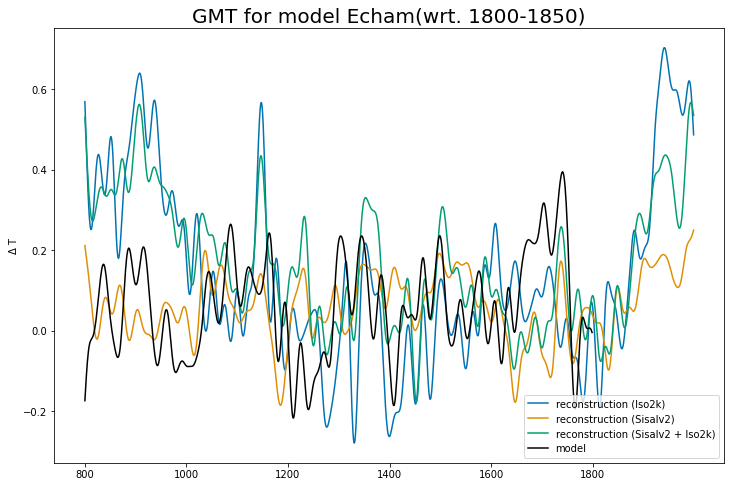

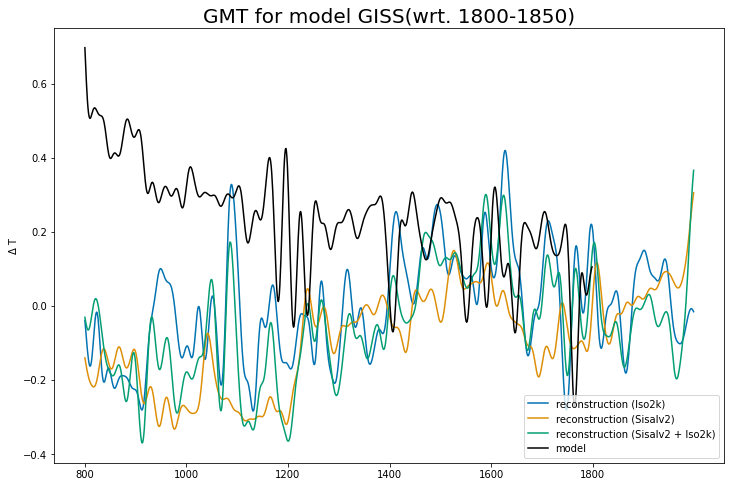

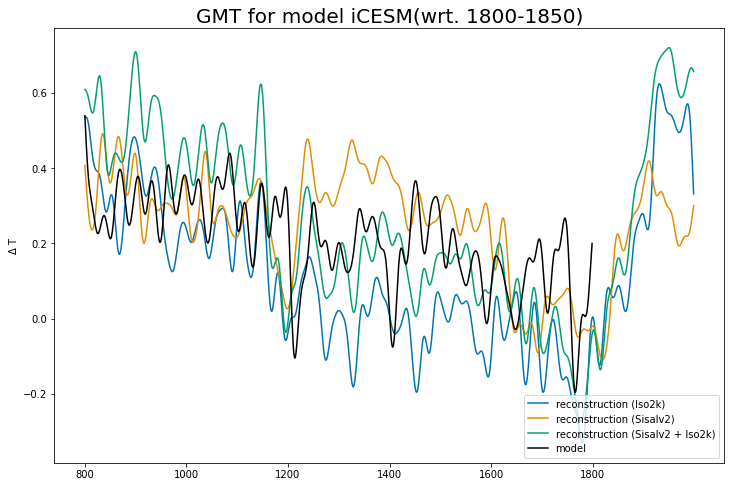

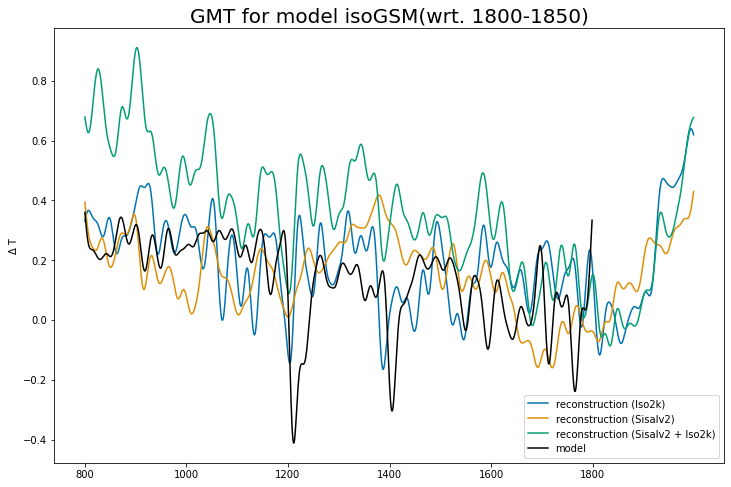

Checking prior for nans
Only nans in year 1426-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1427-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1428-01-01 00:00:00 . Replaced values with previous year


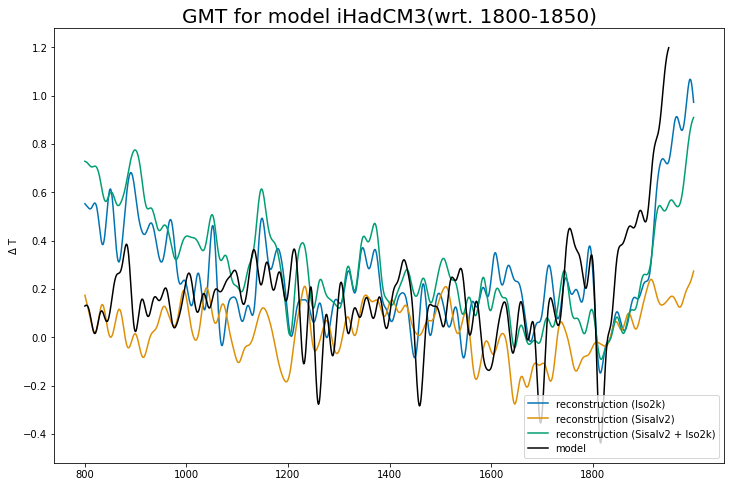

In [112]:
gmt_separate_all(folder1='/home/mchoblet/paleoda/results/experiments/GMT_from_icecores/',
    folder2='/home/mchoblet/paleoda/results/experiments/GMT_from_speleos/',
    folder3='/home/mchoblet/paleoda/results/experiments/GMT_from_allproxies/',
    names=['Echam', 'GISS', 'iCESM', 'isoGSM', 'iHadCM3'])

# GMT Plots (Mini R)
- anomaly (1600-1800 mean as reference)
- Timescales (1,5,10,20,40), in Iso2k only plot (1,10,20), reusing proxies
- Proxy Error = 0.01

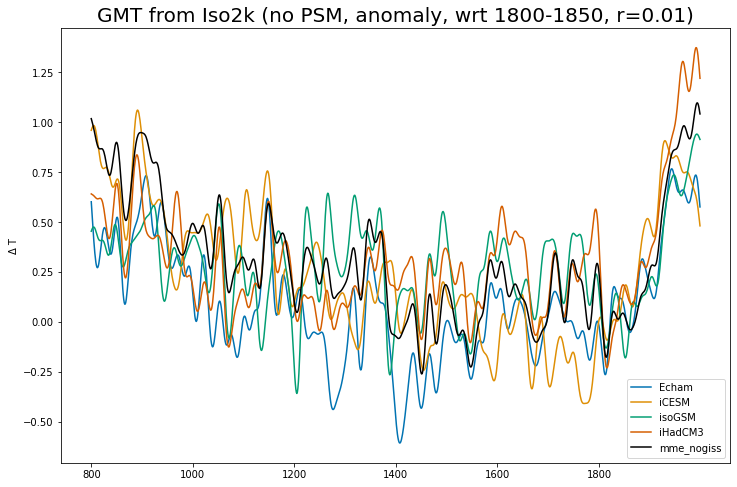

In [114]:
gmt_together(folder='/home/mchoblet/paleoda/results/experiments/GMT_from_icecores_minir/', names=['Echam','iCESM','isoGSM','iHadCM3','mme_nogiss'],title='GMT from Iso2k (no PSM, anomaly, wrt 1800-1850, r=0.01)')

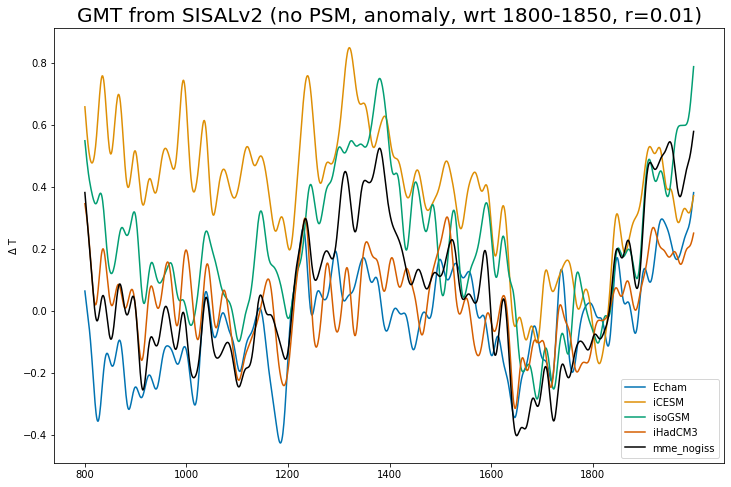

In [115]:
gmt_together(folder='/home/mchoblet/paleoda/results/experiments/GMT_from_speleos_minir/', names=['Echam','iCESM','isoGSM','iHadCM3','mme_nogiss'],title='GMT from SISALv2 (no PSM, anomaly, wrt 1800-1850, r=0.01)')

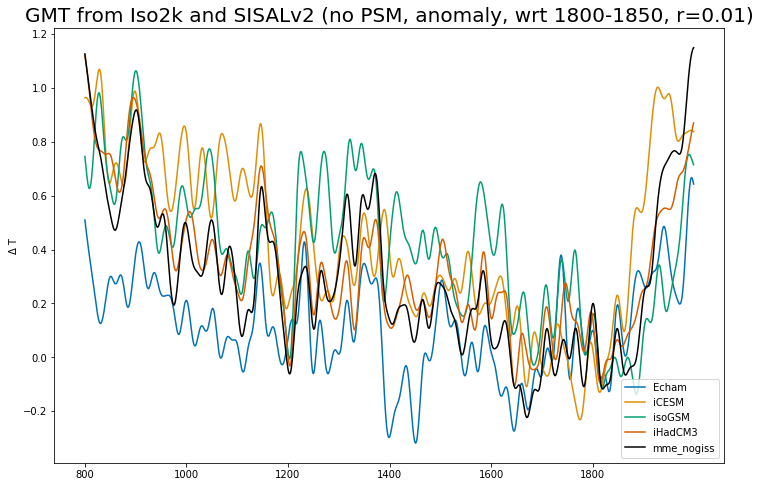

In [116]:
gmt_together(folder='/home/mchoblet/paleoda/results/experiments/GMT_from_allproxies_minir/', names=['Echam','iCESM','isoGSM','iHadCM3','mme_nogiss'],title='GMT from Iso2k and SISALv2 (no PSM, anomaly, wrt 1800-1850, r=0.01)')

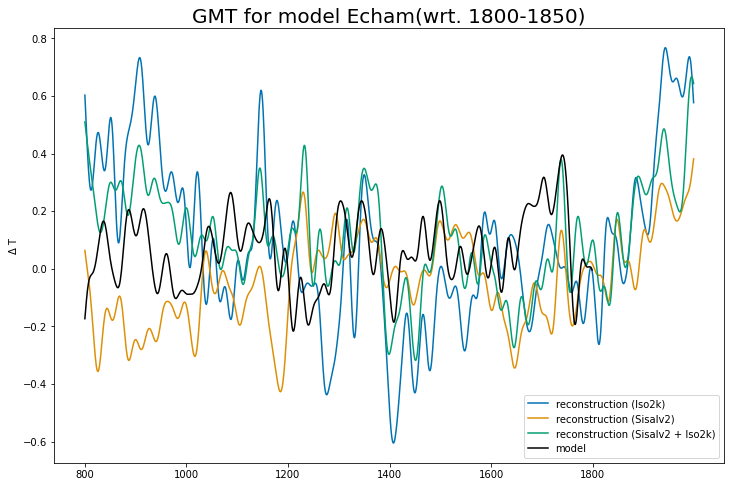

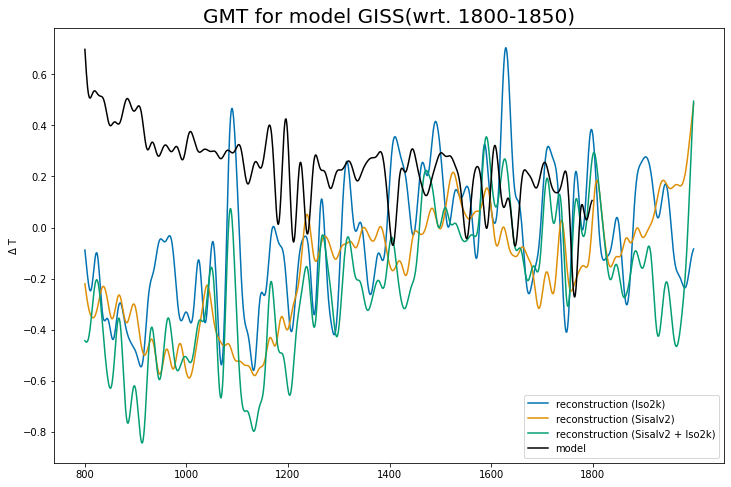

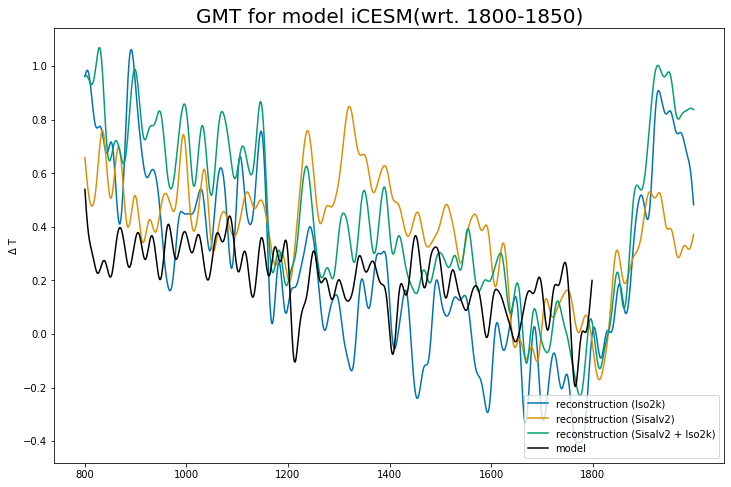

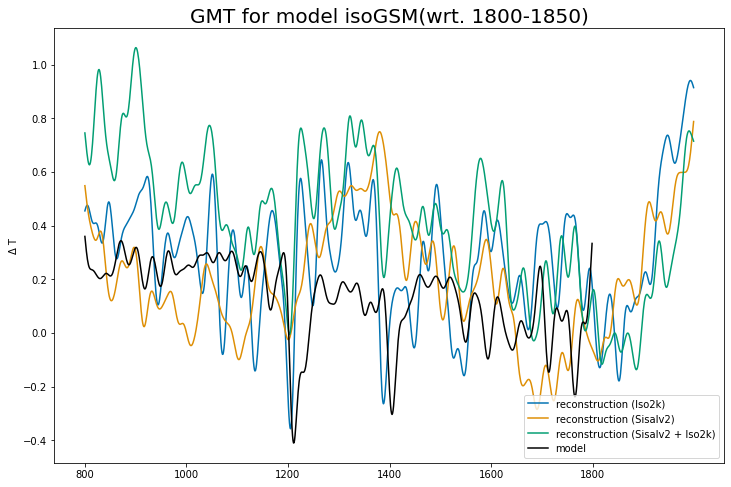

Checking prior for nans
Only nans in year 1426-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1427-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1428-01-01 00:00:00 . Replaced values with previous year


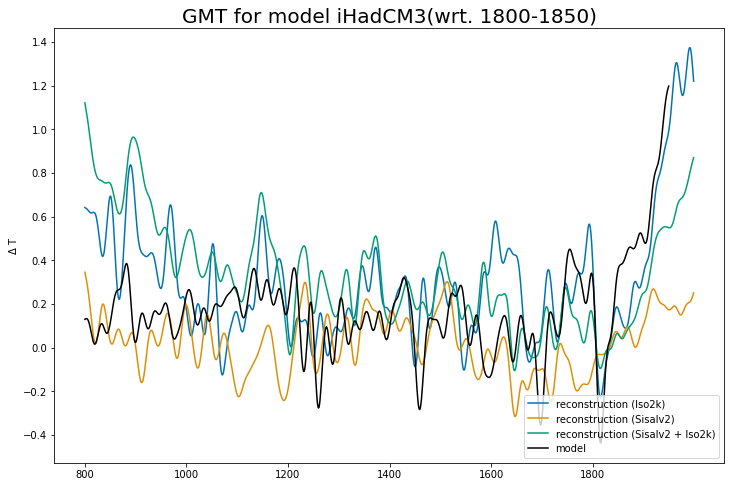

In [117]:
gmt_separate_all(folder1='/home/mchoblet/paleoda/results/experiments/GMT_from_icecores_minir/',
    folder2='/home/mchoblet/paleoda/results/experiments/GMT_from_speleos_minir/',
    folder3='/home/mchoblet/paleoda/results/experiments/GMT_from_allproxies_minir/',
    names=['Echam', 'GISS', 'iCESM', 'isoGSM', 'iHadCM3'])